In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


df = pd.read_csv('AmesHousingNormalized.csv')
df

,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Full Bath,Year Remod/Add,Garage Yr Blt,Mas Vnr Area,SalePrice
0,0.569337,0.666667,0.550574,0.498212,0.732004,0.600,0.333333,0.166667,0.519231,0.275862,0.620009
1,0.242033,0.333333,0.761210,0.397036,0.311185,0.608,0.333333,0.183333,0.528846,0.000000,0.282733
2,0.428510,0.333333,0.325339,0.625447,0.550941,0.584,0.333333,0.133333,0.500000,0.266010,0.488165
3,0.764858,0.666667,0.544317,0.452223,0.983389,0.664,0.666667,0.300000,0.596154,0.000000,0.708927
4,0.557709,0.666667,0.502607,0.420542,0.328904,0.896,0.666667,0.800000,0.875000,0.000000,0.543049
...,...,...,...,...,...,...,...,...,...,...,...
2925,0.288114,0.666667,0.613139,0.458866,0.370432,0.792,0.333333,0.566667,0.750000,0.000000,0.397713
2926,0.244617,0.666667,0.504692,0.387839,0.314507,0.784,0.333333,0.550000,0.740385,0.000000,0.362453
2927,0.273902,0.000000,0.000000,0.412366,0.352159,0.856,0.333333,0.700000,0.701923,0.000000,0.365519
2928,0.454350,0.666667,0.435871,0.656106,0.584164,0.712,0.333333,0.416667,0.663462,0.000000,0.482032


In [16]:
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean Squared Error:", -scores.mean())
LinearRegressionMSE = -scores.mean()

Mean Squared Error: 0.011360886592556607


In [17]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
RandomForestMSE = mse

Mean Squared Error: 0.008637787154420932


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Gradient Boosting): {mse}")
GradientBoostingMSE = mse

Mean Squared Error (Gradient Boosting): 0.009370518132642038


In [19]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (SVR): {mse}")
SVRMSE = mse

Mean Squared Error (SVR): 0.015077084480146913


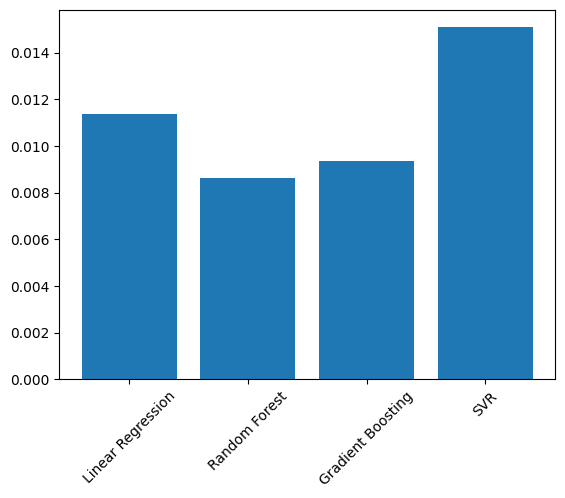

In [27]:
dict = {'Linear Regression': LinearRegressionMSE, 'Random Forest': RandomForestMSE, 'Gradient Boosting': GradientBoostingMSE, 'SVR': SVRMSE}
plt.bar(range(len(dict)), list(dict.values()), align='center')
plt.xticks(range(len(dict)), list(dict.keys()), rotation=45)
plt.show()

We can see that Random Forest Regressor has the smallest mean squared error